Import knihoven


In [1]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt


Import souboru se jmeny 

In [2]:
classesfile='coco.names'
classNames=[]
with open(classesfile,'rt') as f:
    classNames=f.read().rstrip('\n').split('\n')

Model

In [3]:
model = YOLO('yolov8m.pt')

Pokud chci hledat urcity objekt zjisti jeho id

In [4]:
searched_object = 'teddy bear'
object_id = classNames.index(searched_object)# zjisti class id objektu co hledam
print(object_id)

77


nacte a zobrazy zvoleny obrazek

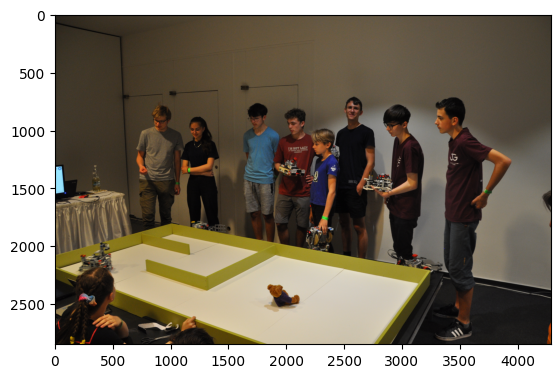

In [5]:
img = cv2.imread('obr2.jpg')
#cv2.imshow('picture',img)
#cv2.waitKey(2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

zjisti velikost obrazku 

In [6]:
img_height,img_width,img_channels = img.shape
print('width',img_width,'Px')
print('height',img_height,'Px')
print('channels',img_channels)

width 4288 Px
height 2848 Px
channels 3


pouziti modelu na nalezeni objektu

In [7]:
results = model(img)



0: 448x640 11 persons, 3 skateboards, 1 bottle, 1 dining table, 1 tv, 1 laptop, 1 teddy bear, 372.3ms
Speed: 3.9ms preprocess, 372.3ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


vykresleni jednotlivych objektu na obrazek

In [8]:
objects_ids = []#list pro uchovavani id nalezenych objektu 
objects_centers=[]#list pro uchovavani souradnic stredu nalezenych objektu
for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])#zjisti classu objektu
            print(classNames[cls])#vypise klassu objektu slovem
            #print(cls) #vypise classu objektu jako id
            #bounding boxes
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px 
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci 
            #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            center = center_x,center_y
            print('center:',center_x,center_y)#vypise udaje 
            cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
            #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
            #box on bounding box s nazvem claasy a confidence modelu 
            cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            objects_ids.append(cls)#zapisovani hodnot do listu
            objects_centers.append(center)#zapisovani hodnot do listu
cv2.line(img,(int(img_width/2),0),(int(img_width/2),img_height),(255,0,255),thickness=2 )#vykresli na video primku stredem videa 

person
X= 3250 Y= 712 W= 3945 H= 2817
center: 3597 1764
confidence: 92
person
X= 696 Y= 781 W= 1111 H= 1872
center: 903 1326
confidence: 91
person
X= 1078 Y= 883 W= 1421 H= 1836
center: 1249 1359
confidence: 90
person
X= 2403 Y= 708 W= 2766 H= 2113
center: 2584 1410
confidence: 89
person
X= 1615 Y= 768 W= 1937 H= 1976
center: 1776 1372
confidence: 88
person
X= 1876 Y= 808 W= 2242 H= 2013
center: 2059 1410
confidence: 88
person
X= 2759 Y= 778 W= 3185 H= 2168
center: 2972 1473
confidence: 87
person
X= 2178 Y= 984 W= 2453 H= 2047
center: 2315 1515
confidence: 80
person
X= 5 Y= 2177 W= 674 H= 2837
center: 339 2507
confidence: 78
bottle
X= 319 Y= 1305 W= 392 H= 1533
center: 355 1419
confidence: 75
laptop
X= 0 Y= 1303 W= 111 H= 1612
center: 55 1457
confidence: 63
skateboard
X= 2863 Y= 2026 W= 3341 H= 2224
center: 3102 2125
confidence: 59
diningtable
X= 1 Y= 1479 W= 674 H= 2077
center: 337 1778
confidence: 58
teddy bear
X= 1830 Y= 2331 W= 2112 H= 2528
center: 1971 2429
confidence: 53
person
X

array([[[ 27,  33,  40],
        [ 25,  31,  38],
        [ 26,  31,  40],
        ...,
        [ 36,  48,  54],
        [ 35,  49,  55],
        [ 37,  51,  57]],

       [[ 29,  31,  41],
        [ 27,  29,  39],
        [ 27,  29,  39],
        ...,
        [ 35,  47,  51],
        [ 29,  43,  49],
        [ 36,  50,  56]],

       [[ 25,  32,  41],
        [ 23,  30,  39],
        [ 21,  28,  37],
        ...,
        [ 35,  47,  51],
        [ 33,  47,  53],
        [ 36,  50,  56]],

       ...,

       [[ 10,  13,  18],
        [ 10,  13,  18],
        [ 10,  13,  18],
        ...,
        [  1,  48, 122],
        [  1,  45, 122],
        [  2,  44, 121]],

       [[ 10,  13,  18],
        [ 10,  13,  18],
        [ 11,  14,  18],
        ...,
        [  1,  46, 119],
        [  1,  46, 120],
        [  0,  38, 113]],

       [[  7,  13,  18],
        [  9,  15,  20],
        [ 14,  19,  22],
        ...,
        [  3,  48, 121],
        [  1,  46, 119],
        [  0,  42, 115]]

vypise id nalezenych objektu 

In [9]:
print(objects_ids)
print(objects_centers)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 39, 63, 36, 60, 77, 0, 0, 36, 62, 36]
[(3597, 1764), (903, 1326), (1249, 1359), (2584, 1410), (1776, 1372), (2059, 1410), (2972, 1473), (2315, 1515), (339, 2507), (355, 1419), (55, 1457), (3102, 2125), (337, 1778), (1971, 2429), (1169, 2773), (4244, 2176), (2285, 1944), (52, 1451), (2790, 1466)]


hledani urciteho objektu

In [10]:
a = objects_ids.index(77)#v listu object_ids hleda urcite cislo a vypise jeho index
print(a)
x,y=objects_centers[a]# v listu object centers hleda pro dany index hodnoty
print(x,y)
center_line = int(img_width/2)# x souradnice primky zobrazujici stred
object_deviation = center_line-x #odchylka objektu od stredu obrazovky
print('deviation = ',object_deviation) 


13
1971 2429
deviation =  173


ukaze obrazek

tensor([[3.2505e+03, 7.1270e+02, 3.9454e+03, 2.8176e+03, 9.2105e-01, 0.0000e+00],
        [6.9635e+02, 7.8176e+02, 1.1116e+03, 1.8725e+03, 9.1639e-01, 0.0000e+00],
        [1.0783e+03, 8.8312e+02, 1.4219e+03, 1.8366e+03, 9.0279e-01, 0.0000e+00],
        [2.4032e+03, 7.0867e+02, 2.7670e+03, 2.1135e+03, 8.9826e-01, 0.0000e+00],
        [1.6158e+03, 7.6880e+02, 1.9371e+03, 1.9767e+03, 8.8718e-01, 0.0000e+00],
        [1.8766e+03, 8.0832e+02, 2.2420e+03, 2.0139e+03, 8.8630e-01, 0.0000e+00],
        [2.7597e+03, 7.7842e+02, 3.1856e+03, 2.1683e+03, 8.7502e-01, 0.0000e+00],
        [2.1783e+03, 9.8459e+02, 2.4535e+03, 2.0472e+03, 8.0971e-01, 0.0000e+00],
        [5.6058e+00, 2.1780e+03, 6.7423e+02, 2.8375e+03, 7.8457e-01, 0.0000e+00],
        [3.1946e+02, 1.3055e+03, 3.9243e+02, 1.5331e+03, 7.5618e-01, 3.9000e+01],
        [1.4026e-01, 1.3040e+03, 1.1189e+02, 1.6125e+03, 6.3528e-01, 6.3000e+01],
        [2.8638e+03, 2.0265e+03, 3.3415e+03, 2.2246e+03, 5.9332e-01, 3.6000e+01],
        [1.1209e

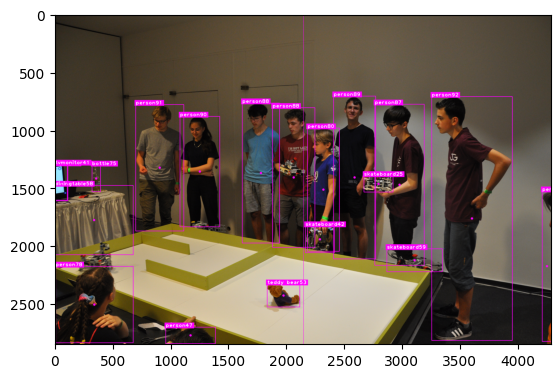

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# konvertuje bgr to rgb
print(boxes.data)
